In [ ]:
"""
#케라스 모델 생성 절차
1) 데이터셋 생성:
    - 훈련, 검증, 테스트
2) 모델 구성...:
    - 시퀀스 모델 생성한 다음에 레이어를 추가
    - 복잡한 모델은 케라스 함수 api 사용하면됨
3) 모델 학습과정 설정:
    - Cost 함수, 최적화 방법 정의
    - Compile함수가 사용됨
4) 모델 학습:
    - 트레이닝 데이터로 모델 학습
    - fit 함수가 사용됨
5) 훈련셋,검증셋의 cost 측정:
6) 모델 평가:
    - test 데이터 셋으로 평가
    - evaluate함수가 사용됨
7) 모델 사용:
    - 입력 -> 모델 -> 출력(예측...)
    - predict 함수가 사용됨
"""

In [1]:
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation

In [45]:
#1. 데이터셋 생성하기
(xTrain,yTrain),(xTest,yTest) = mnist.load_data() # 2개씩 들어옴

In [46]:
xTrain = xTrain.reshape(60000,784).astype('float32')/255.0
xTest = xTest.reshape(10000,784).astype('float32')/255.0

In [47]:
yTrain = np_utils.to_categorical(yTrain)   #<- 원핫인코딩하는 함수: np_utils
yTest = np_utils.to_categorical(yTest)

In [48]:
#2. 모델 구성
model=Sequential()
model.add(Dense(units=64,input_dim=28*28,activation='relu'))
model.add(Dense(units=10, activation='softmax')) # layer를 추가할 때 함수Dense를 사용

In [49]:
#3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [50]:
#4. 모델 학습
hist = model.fit(xTrain, yTrain, epochs=5, batch_size=32)#epoch: 데이터를 몇 번 학습할 거냐
#batch_size: 몇 개의 샘플로 가중치를 갱신할 거냐


Epoch 1/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.6710 - accuracy: 0.8289
Epoch 2/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.3431 - accuracy: 0.9037
Epoch 3/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.2965 - accuracy: 0.9164
Epoch 4/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.2678 - accuracy: 0.9241
Epoch 5/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.2462 - accuracy: 0.9308


In [52]:
print("loss:",hist.history['loss'])
print("accuracy:",hist.history['accuracy'])

loss: [0.6710068199674288, 0.34313783300320305, 0.29646547234654425, 0.26780129848321277, 0.24623901411096255]
accuracy: [0.82888335, 0.9036833, 0.9163833, 0.9241167, 0.93075]


In [53]:
res = model.evaluate(xTest,yTest,batch_size=3)

10000/10000 [==============================] - 1s 82us/step


In [54]:
#모델 예측
xhat = xTest[0:1]
yhat = model.predict(xhat)
print(yhat)

[[4.1925501e-05 1.6435973e-08 1.8481190e-04 1.1433597e-03 6.9115686e-07
  1.9044955e-05 5.3961910e-09 9.9833089e-01 2.1637268e-05 2.5770490e-04]]


In [55]:
"""
-훈련셋 : 모의고사
-검증셋 : 
=> 테스트셋 : (작년)수능     학생:5명, 모델:5개

*(학생마다)공부하는 법이 다 다름: 모델이 다 다름

학습? 문제, 답안지 제공
"""

'\n-훈련셋 : 모의고사\n-검증셋 : \n=> 테스트셋 : (작년)수능     학생:5명, 모델:5개\n\n*(학생마다)공부하는 법이 다 다름: 모델이 다 다름\n\n학습? 문제, 답안지 제공\n'

In [ ]:
"""
-훈련데이터셋(70) / 시험셋(30) (<-작년수능)
-훈련셋: <훈련셋(70)> / <검증셋(30)>
실전: 올해 수능
=> 훈련셋에 최적의 데이터 셋의 비중을 하이퍼파라미터!
하이퍼파라미터 튜닝을 해야함
조기종료를 잘 해야함(너무 많이 학습하면 과적합)
"""

In [ ]:
"""
모의고사: #1 ~ 4 학습 #5로 평가 = 점수 A
        #1,2,3,5 학습 #4로 평가 = 점수 B
        ...
        --------------------------------
                              => (평균,분산) *분산을보는이유:1,2,3,4회에선 90%이상인데
                                                       5회에서 40%가 나오면 문제가 있음
"""

In [3]:
import numpy as np
np.random.seed(3)

In [4]:
(xTrain,yTrain),(xTest,yTest) = mnist.load_data()

In [5]:
xVal = xTrain[50000:]
yVal = yTrain[50000:]
xTrain = xTrain[:50000]
yTrain = yTrain[:50000]

In [6]:
xTrain=xTrain.reshape(50000,784).astype('float32')/255.0
xVal=xVal.reshape(10000,784).astype('float32')/255.0
xTest=xTest.reshape(10000,784).astype('float32')/255.0

In [7]:
#훈련, 검증 데이터 선택
tri=np.random.choice(50000,700)
vri=np.random.choice(10000,300)

In [8]:
xTrain=xTrain[tri] #700
yTrain=yTrain[tri]
xVal=xVal[vri] #300
yVal=yVal[vri]

In [9]:
yTrain = np_utils.to_categorical(yTrain)
yVal = np_utils.to_categorical(yVal)
yTest = np_utils.to_categorical(yTest)

In [12]:
model=Sequential()

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.add(Dense(input_dim=28*28, units=2,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [16]:
hist=model.fit(xTrain,yTrain,epochs=3000, batch_size=10, validation_data=(xVal,yVal))


Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 160us/step - loss: 2.2576 - accuracy: 0.1643 - val_loss: 2.2272 - val_accuracy: 0.1633
Epoch 2/3000
700/700 [==============================] - 0s 76us/step - loss: 2.2072 - accuracy: 0.1657 - val_loss: 2.1908 - val_accuracy: 0.1800
Epoch 3/3000
700/700 [==============================] - 0s 71us/step - loss: 2.1730 - accuracy: 0.1729 - val_loss: 2.1631 - val_accuracy: 0.1867
Epoch 4/3000
700/700 [==============================] - 0s 67us/step - loss: 2.1441 - accuracy: 0.1786 - val_loss: 2.1372 - val_accuracy: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s 67us/step - loss: 2.1177 - accuracy: 0.1900 - val_loss: 2.1141 - val_accuracy: 0.1867
Epoch 6/3000
700/700 [==============================] - 0s 67us/step - loss: 2.0940 - accuracy: 0.2029 - val_loss: 2.0931 - val_accuracy: 0.2033
Epoch 7/3000
700/700 [==============================] - 0s 67us/step - loss: 2.072

In [17]:
import matplotlib.pyplot as plt

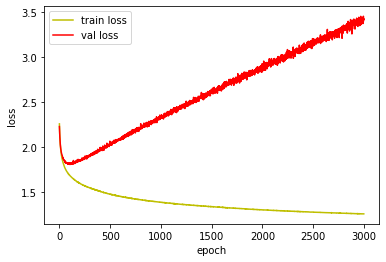

In [18]:
fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')
loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

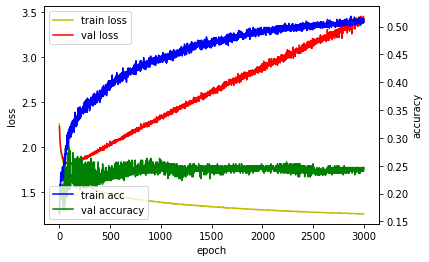

In [21]:
fig, loss_ax = plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val accuracy')

acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [23]:
res=model.evaluate(xTest,yTest,batch_size=32) # training을 너무 과하게 함
print("cost:"+str(res[0]))
print("accuracy:"+str(res[1]))

10000/10000 [==============================] - 0s 9us/step
cost:3.706244239425659
accuracy:0.2597000002861023


In [ ]:
#(학습) 조기종료(:earlystopping)에 관한 것
#콜백함수: 어떤 상황이 되었을 떄(val_lost가 떨어지다 올라가는 시점) 
#함수 내에서 또 다른 함수를 호출하는 것


In [ ]:
*함수 설명(keras.io에서 earlystop검색 후)
keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', 
                                        min_delta=0, #변화량
                                        patience=0,  # 개선이 안되어도 몇 epoch까지 참을지
                                        verbose=0, # 출력모드
                                        mode='auto', 
                                        baseline=None, 
                                        restore_best_weights=False)
"""
-min_delta: minimum change in the monitored quantity to qualify as an improvement, 
    i.e. an absolute change of less than min_delta, will count as no improvement
-patience: number of epochs that produced the monitored quantity with no improvement 
    after which training will be stopped. Validation quantities may not be produced 
    for every epoch, if the validation frequency (model.fit(validation_freq=5)) is 
    greater than one.
-mode: one of {auto, min, max}. In min mode, training will stop when the quantity 
    monitored has stopped decreasing; in max mode it will stop when the quantity 
    monitored has stopped increasing; in auto mode, the direction is automatically 
    inferred from the name of the monitored quantity.
"""

In [24]:
from keras.callbacks import EarlyStopping

In [25]:
es=EarlyStopping()

In [26]:
hist=model.fit(xTrain,yTrain,epochs=3000,
               batch_size=10,
               validation_data=(xVal,yVal),
              callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 86us/step - loss: 1.2591 - accuracy: 0.5129 - val_loss: 3.3829 - val_accuracy: 0.2433
Epoch 2/3000
700/700 [==============================] - 0s 69us/step - loss: 1.2582 - accuracy: 0.5114 - val_loss: 3.4305 - val_accuracy: 0.2400


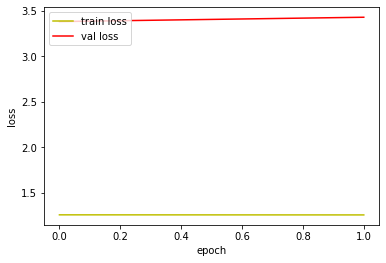

In [27]:
fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')
loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [28]:
es=EarlyStopping(patience=30)

In [29]:
hist=model.fit(xTrain,yTrain,epochs=3000,
               batch_size=10,
               validation_data=(xVal,yVal),
              callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 83us/step - loss: 1.2585 - accuracy: 0.5114 - val_loss: 3.4252 - val_accuracy: 0.2433
Epoch 2/3000
700/700 [==============================] - 0s 76us/step - loss: 1.2583 - accuracy: 0.5143 - val_loss: 3.4071 - val_accuracy: 0.2433
Epoch 3/3000
700/700 [==============================] - 0s 64us/step - loss: 1.2588 - accuracy: 0.5114 - val_loss: 3.3381 - val_accuracy: 0.2400
Epoch 4/3000
700/700 [==============================] - 0s 66us/step - loss: 1.2589 - accuracy: 0.5086 - val_loss: 3.3982 - val_accuracy: 0.2433
Epoch 5/3000
700/700 [==============================] - 0s 66us/step - loss: 1.2585 - accuracy: 0.5100 - val_loss: 3.4151 - val_accuracy: 0.2367
Epoch 6/3000
700/700 [==============================] - 0s 68us/step - loss: 1.2581 - accuracy: 0.5143 - val_loss: 3.4095 - val_accuracy: 0.2433
Epoch 7/3000
700/700 [==============================] - 0s 71us/step - loss: 1.2587 

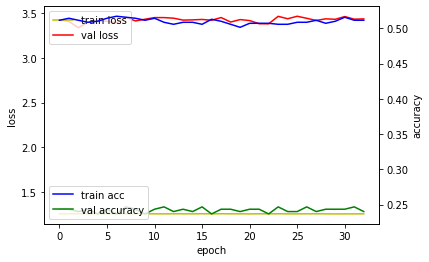

In [31]:
fig, loss_ax = plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val accuracy')

acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [32]:
import tensorflow as tf

In [33]:
seed=123
np.random.seed(seed)
tf.set_random_seed(seed)

In [35]:
dataset=np.loadtxt("C:/Users/김경한/jupyter notebook data/dataset/ThoraricSurgery.csv",
          delimiter=',')

In [36]:
dataset

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [37]:
x=dataset[:,0:17] # <- 0번부터 16번까지
y=dataset[:,17] # 1:수술후 생존, 0:사망

In [38]:
model=Sequential()

In [66]:
model.add(Dense(30, # <- 출력이 30개
                input_dim=17,  # <- node: 17개
                activation='relu'))  # <- keras.io에서 dense 검색
model.add(Dense(1,activation='sigmoid')) #<-0 or 1이니까 1로 지정(2가지경우라 2라고 착각할 수 있음,
#0또는1값을 갖는 node가 1개라는의미)
#input_dim을 30지정해줘야하는데 함수가 알아서 맞춰줘서 안해줘도됨
"""
위 model은 layer가 2개인 상태
"""

'\n위 model은 layer가 2개인 상태\n'

In [67]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

In [68]:
model.fit(x,y,epochs=30,batch_size=10)

ValueError: When feeding symbolic tensors to a model, we expect the tensors to have a static batch size. Got tensor with shape: (None, 8)

In [42]:
print(model.evaluate(x,y)) # Output: [cost, accuracy]

470/470 [==============================] - 0s 53us/step
[0.1484501694111114, 0.8510638475418091]


In [69]:
xy=np.loadtxt('C:/Users/김경한/jupyter notebook data/실습데이터/실습데이터/data-03-diabetes.csv',
          delimiter=',')

In [70]:
xdata=xy[:,0:-1] #<- 전체행에서 열이 맨 마지막에 있는거 앞까지

In [72]:
ydata=xy[:,[-1]] # 맨마지막 열, 당뇨병

In [73]:
print(xdata.shape, ydata.shape)

(759, 8) (759, 1)


In [74]:
w=tf.Variable(tf.random_normal([8,1])) #<-y의 갯수와 1의 자리가 같아야함, 그래야 matmul가능
b=tf.Variable(tf.random_normal([1]))
x=tf.placeholder(tf.float32,shape=[None,8])
y=tf.placeholder(tf.float32,shape=[None,1])

In [75]:
"""
Xdata: 
*xn:혈당량 등등의 특성
*행: 환자 한명의 데이터
     x1  x2 ...                      x8    weight              yhat(0~1)
    [                                     [  0.1             [
                                            ...
None                                                 + bias = 

                                       ]     0.5  ]                   ]
 

=>데이터를 한번 읽어서 yhat과 실제 y값의 차가 있을 경우
backpropagation을 통해 weight들을 업데이트 해줌 = 한번 다 할 경우 batch_size=1

"""

'\nXdata: \n*xn:혈당량 등등의 특성\n*행: 환자 한명의 데이터\n     x1  x2 ...                      x8    weight              yhat(0~1)\n    [                                     [  0.1             [\n                                            ...\nNone                                                 + bias = \n\n                                       ]     0.5  ]                   ]\n \n\n=>데이터를 한번 읽어서 yhat과 실제 y값의 차가 있을 경우\nbackpropagation을 통해 weight들을 업데이트 해줌 = 한번 다 할 경우 batch_size=1\n\n'

In [76]:
#설명 후 이어서
w=tf.Variable(tf.random_normal([8,1])) #<-y의 갯수와 1의 자리가 같아야함, 그래야 matmul가능
b=tf.Variable(tf.random_normal([1]))
x=tf.placeholder(tf.float32,shape=[None,8])
y=tf.placeholder(tf.float32,shape=[None,1])

In [77]:
hf = tf.sigmoid(tf.matmul(x,w) + b)
cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [78]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [79]:
predicted = tf.cast(hf>0.5,dtype=tf.float32) # <-hf>0.5가 boolen값으로 나와서 cast해줌
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y),
                                  dtype=tf.float32)) #<-얘도 boolen

In [80]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cv,_= sess.run([cost,train],
                        feed_dict={x:xdata,y:ydata})
        if step%200==0:
            print(step,cv)
    hv,pv,av= sess.run([hf,predicted,accuracy],feed_dict={x:xdata, y:ydata})
    print(hv,pv,av)

0 1.0686553
200 0.6408585
400 0.5791498
600 0.5638329
800 0.55512637
1000 0.54806894
1200 0.54187816
1400 0.53635705
1600 0.53140694
1800 0.5269537
2000 0.52293557
2200 0.5193
2400 0.5160014
2600 0.51300114
2800 0.5102653
3000 0.50776476
3200 0.5054743
3400 0.5033717
3600 0.50143766
3800 0.49965534
4000 0.49800983
4200 0.4964881
4400 0.49507836
4600 0.4937705
4800 0.4925553
5000 0.49142465
5200 0.4903711
5400 0.48938853
5600 0.48847076
5800 0.48761255
6000 0.48680934
6200 0.48605657
6400 0.48535052
6600 0.48468766
6800 0.48406476
7000 0.48347884
7200 0.48292732
7400 0.4824077
7600 0.48191783
7800 0.48145565
8000 0.48101923
8200 0.48060694
8400 0.480217
8600 0.47984815
8800 0.47949898
9000 0.47916824
9200 0.47885466
9400 0.47855735
9600 0.4782752
9800 0.47800744
10000 0.47775295
[[0.39503556]
 [0.92584455]
 [0.2682017 ]
 [0.9374617 ]
 [0.20025137]
 [0.7908606 ]
 [0.9392321 ]
 [0.59571975]
 [0.22430554]
 [0.54732454]
 [0.7088856 ]
 [0.17492011]
 [0.3393364 ]
 [0.21336707]
 [0.76910806]
 